### IMPORT LIBRARES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from EDA_funs import eda_diab

### IMPORT DATA

In [21]:
df = pd.read_csv('diabetes.csv')

#### Display head

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Display shape of the Data frame

In [23]:
df.shape

(768, 9)

In [24]:
X = df.drop(columns = ['Outcome'])
Y = df['Outcome']

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### VISUALIZATION

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
import plotly.express as px
pie_ = eda_diab()
pie_.pie(df,X,Y)

NameError: name 'px' is not defined

NameError: name 'plt' is not defined

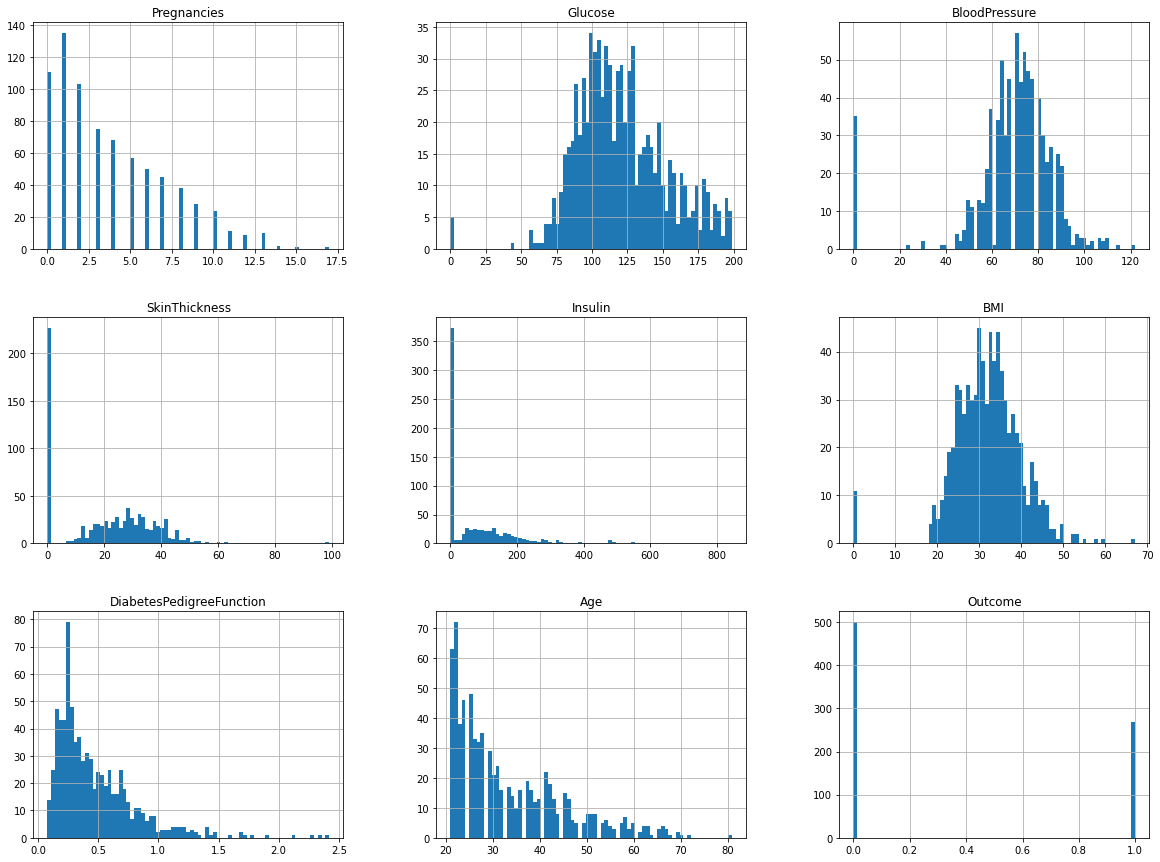

In [29]:
hist_ = eda_diab()
hist_.group_hist(df,X,Y)

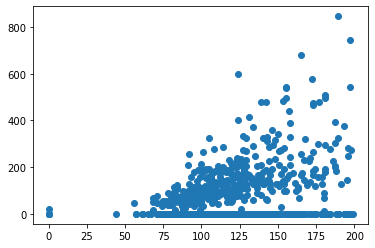

In [545]:
plt.scatter(X['Glucose'], X['Insulin'])

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='

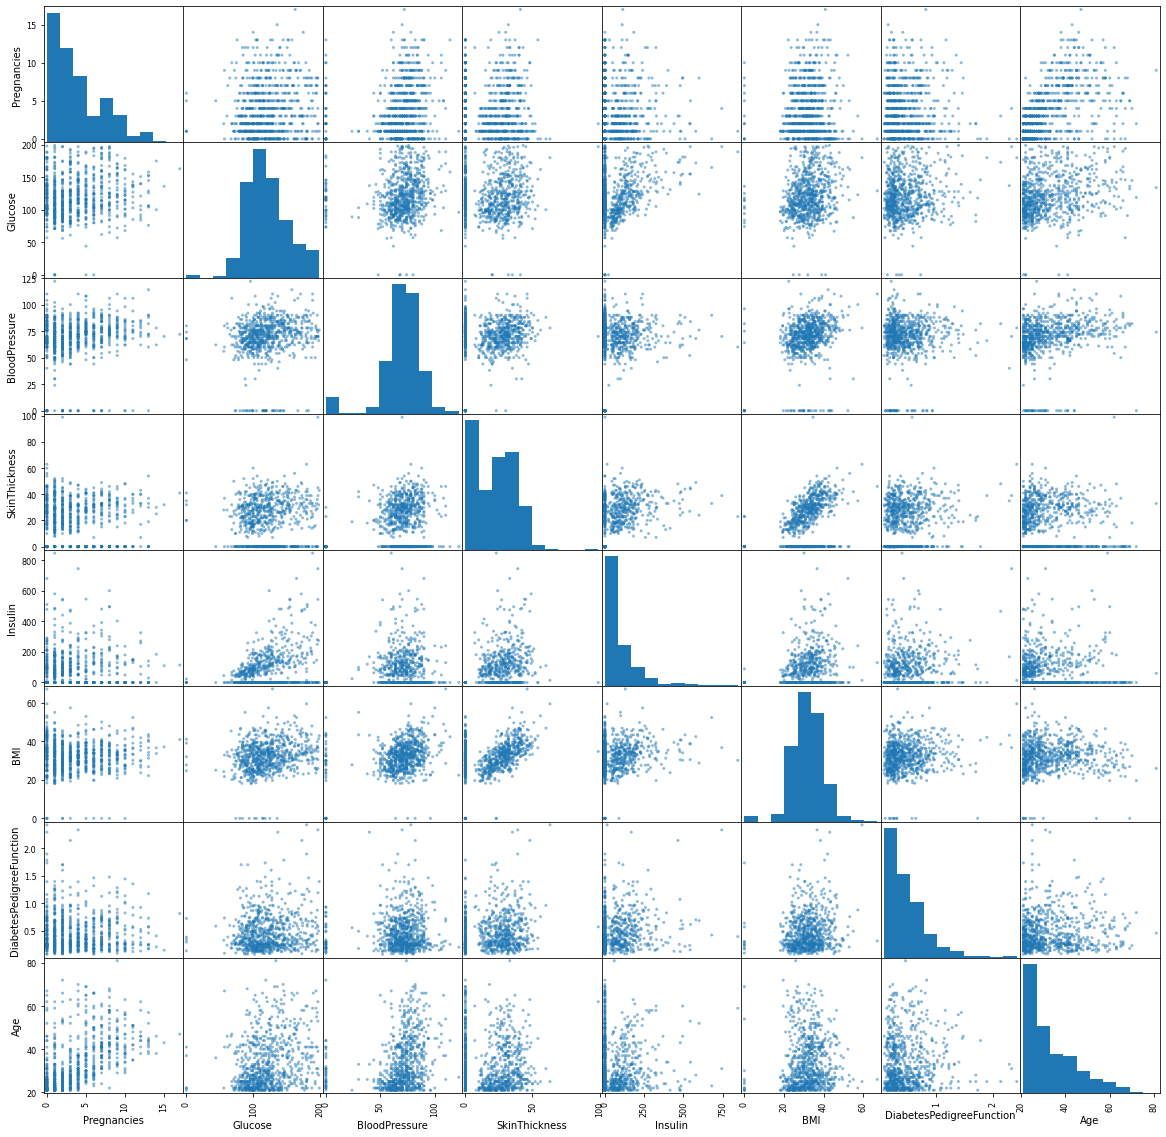

In [546]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize=(20,20))

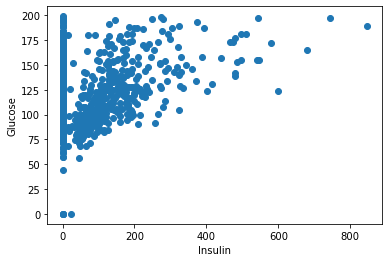

In [547]:
plt.scatter(X['Insulin'],X['Glucose'])
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

In [548]:
box_1 = eda_diab()
box_1.box_plots_tot(X)


In [550]:
box_1 = eda_diab()
box_1.box_plots_tot(X)

In [533]:
box_plots_tot(X)

### CLUSTERING USING PCA

In [423]:
from sklearn.decomposition import PCA

In [513]:
PC = eda_diab()
PC.pca_viz(df,X,Y)

TypeError: pca_viz() takes 3 positional arguments but 4 were given

In [343]:
# pca = PCA()
# pca.fit(X)
# cumsum = np.cumsum(pca.explained_variance_ratio_ = 0.95)
# print(cumsum)

[0.88854663 0.95013742 0.97592754 0.98901367 0.99645461 0.99948076
 0.99999321 1.        ]


In [424]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(768, 2)

In [426]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced.columns = ['PC1', 'PC2']
X_reduced.head()

,PC1,PC2
0,-75.714655,-35.950783
1,-82.358268,28.908213
2,-74.630643,-67.906496
3,11.077423,34.898486
4,89.743788,-2.746937


In [431]:
df_reduced = pd.concat([X_reduced,Y], axis = 1)

In [434]:
df_reduced.head()

,PC1,PC2,Outcome
0,-75.714655,-35.950783,1
1,-82.358268,28.908213,0
2,-74.630643,-67.906496,1
3,11.077423,34.898486,0
4,89.743788,-2.746937,1


In [453]:
df['Outcome_label'] = np.zeros(len(df))
df['Outcome_label'] = np.where((df['Outcome'] == 0) ,'Healthy', df['Outcome_label'])
df['Outcome_label'] = np.where((df['Outcome'] == 1),'Sick', df['Outcome_label'])


In [454]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_label
0,6,148,72,35,0,33.6,0.627,50,1,Sick
1,1,85,66,29,0,26.6,0.351,31,0,Healthy
2,8,183,64,0,0,23.3,0.672,32,1,Sick
3,1,89,66,23,94,28.1,0.167,21,0,Healthy
4,0,137,40,35,168,43.1,2.288,33,1,Sick
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Healthy
764,2,122,70,27,0,36.8,0.340,27,0,Healthy
765,5,121,72,23,112,26.2,0.245,30,0,Healthy
766,1,126,60,0,0,30.1,0.349,47,1,Sick


In [469]:
fig = px.scatter(X_reduced,x='PC1', y='PC2', color=df['Outcome_label'])
features = ['PC1','PC2']
dimensions=features
Xlabel = 'PC1'
fig.show()

### STACKED BAR

In [476]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome_label'],
      dtype='object')

In [477]:
fig = px.bar(df, x="Glucose", y="Age", color="Outcome_label", title="Long-Form Input")
fig.show()


In [474]:
df = df.query("X == 'BloodPressure'")
fig = px.bar(df, x='Glucose', y='Insulin',
             hover_data=['Glucose', 'Insulin'], color='Outcome_label',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

UndefinedVariableError: name 'X' is not defined

### VISUALIZATION USING FUNCTIONS

In [486]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [493]:
from EDA_funs import eda_diab



In [495]:
pie_ = eda_diab()
pie_.pie(df,X,Y)

In [521]:
    def box_plots_tot(X):
        fig = go.Figure()
        for i in range (len(X.columns)):
            fig.add_trace(go.Box(
                y=list(X.columns[i]),
                name=X.columns[i],
                jitter=0.5,
                boxpoints='all'
                ))           
        fig.update_layout(
            boxmode='group'
        )
        fig.show()
    def box_plots_1(X): ###Sick Class(1)
        fig = go.Figure()
        for i in range (len(X.columns)):
            fig.add_trace(go.Box(
                y=list(X.columns[i]),
                x=np.array(Y),
                name=X.columns[i],
                jitter=0.5,
                boxpoints='all'
                ))
            
        fig.update_layout(
            boxmode='group'

        )
        fig.show()

In [522]:
box_plots_1(X)